# <center> **Oil Pipeline Accidents Analysis and Clustering (2010 - 2017)**

# **1. Context**
Despite the technological advances that occur in the world, where industries have not been immune to it, accidents are still seen in factories and work environments. I want to perform an analysis of the "Oil Pipeline Accidents, 2010-Present" found in Kaggle (Link: https://www.kaggle.com/datasets/usdot/pipeline-accidents) and see in a descriptive way the situation of time, incidents, injuries and lost in USA.

## Content
This database each record being an accident. I would have liked to see each column in detail, but I couldn't find it on Kaggle and on the source page: (Link: https://www.phmsa.dot.gov/data-and-statistics/pipeline/distribution-transmission-gathering-lng-and-liquid-accident-and-incident-data) but it was not possible to determine exactly what each of them meant. However, I placed the list of columns and it is understandable with the title of what each of them is about:

**Columns:**
* ***Report Number***
* ***Supplemental Number***
* ***Accident Year***
* ***Accident Date/Time***
* ***Operator ID***
* ***Operator Name***
* ***Pipeline/Facility Name***
* ***Pipeline Location***
* ***Pipeline Type***
* ***Liquid Type***
* ***Liquid Subtype***
* ***Liquid Name***
* ***Accident City***
* ***Accident County***
* ***Accident State***
* ***Accident Latitude***
* ***Accident Longitude***
* ***Cause Category***
* ***Cause Subcategory***
* ***Unintentional Release (Barrels)***
* ***Intentional Release (Barrels)***
* ***Liquid Recovery (Barrels)***
* ***Net Loss (Barrels)***
* ***Liquid Ignition***
* ***Liquid Explosion***
* ***Pipeline Shutdown***
* ***Shutdown Date/Time***
* ***Restart Date/Time***
* ***Public Evacuations***
* ***Operator Employee Injuries***
* ***Operator Contractor Injuries***
* ***Emergency Responder Injuries***
* ***Other Injuries***
* ***Public Injuries***
* ***All Injuries***
* ***Operator Employee Fatalities***
* ***Operator Contractor Fatalities***
* ***Emergency Responder Fatalities***
* ***Other Fatalities***
* ***Public Fatalities***
* ***All Fatalities***
* ***Property Damage Costs***
* ***Lost Commodity Costs***
* ***Public/Private Property Damage Costs***
* ***Emergency Response Costs***
* ***Environmental Remediation Costs***
* ***Other Costs***
* ***All Costs***

# **2. Import libraries**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

# **3. Load Datasets**

In [2]:
data = pd.read_csv('./database.csv')

# **4. Data Description and Cleaning**

In [3]:
pd.set_option('display.max_columns', None) ## Get all columns
data.head(5)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [4]:
print(f'The columns number of dataset:',data.shape[1])
print(f'The rows number of dataset:',data.shape[0])

The columns number of dataset: 48
The rows number of dataset: 2795


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

## Remove duplicated and Not necesary information

In [6]:
# Get rows duplicated
data[data.duplicated()]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs


In [7]:
count_nan = data.isnull().sum()

nan_table = pd.DataFrame(data.isnull().sum(), columns=['count_nan'])
nan_table = nan_table.reset_index()
nan_table.columns = ['Column Name', 'Count NaN']
nan_table["%"] = nan_table["Count NaN"]/data.shape[0]*100
nan_table.sort_values(by="%", ascending=False, inplace=True)
nan_table

,Column Name,Count NaN,%
40,All Fatalities,2787,99.713775
35,Operator Employee Fatalities,2787,99.713775
36,Operator Contractor Fatalities,2787,99.713775
37,Emergency Responder Fatalities,2787,99.713775
38,Other Fatalities,2787,99.713775
39,Public Fatalities,2787,99.713775
31,Emergency Responder Injuries,2783,99.570662
29,Operator Employee Injuries,2783,99.570662
32,Other Injuries,2783,99.570662
33,Public Injuries,2783,99.570662


### ***Note***: 
Up to this point we have seen two aspects:

1. There are no duplicate records, so there will be no deletion for this reason
2. When counting and seeing the % of nulls in each column, we see that there are columns that have more than 90% in their columns with nulls, which would not contribute to the segmentation model

That said, I proceed to eliminate columns with more than 90% NaN's.

In [8]:
data.drop(['All Fatalities','Operator Employee Fatalities','Operator Contractor Fatalities','Emergency Responder Fatalities','Other Fatalities','Public Fatalities','Emergency Responder Injuries','Operator Employee Injuries','Other Injuries','Public Injuries','All Injuries','Operator Contractor Injuries','Liquid Name'], axis=1, inplace= True)

Other columns to delete:
* ***Report Number***: Because is an index or register number, so isn´t information to this model.
* ***Supplemental Number***: Because is an index or register number, so isn´t information to this model.
* ***Operator ID***: Because is an identification number, so isn´t information to this model.
* ***Accident County***: because I already have the name of the city, which is the one with the greatest granularity and therefore it is the one I am going to use.
* ***Accident Latitude***: Because is information related of ubication, but i use city name oof accident.
* ***Accident Longitude***: Because is information related of ubication, but i use city name oof accident.
* ***Shutdown Date/Time***: For this analysis, this column overlaps with the pipeline shutdown column, because if the pipeline shutdown column says "yes", a shutdown start value must appear here, otherwise it will not exit.
* ***Restart Date/Time***: For this analysis, this column overlaps with the pipeline shutdown column, because if the pipeline shutdown column says "yes", a shutdown finish value must appear here, otherwise it will not exit.

In [9]:
data.drop(['Report Number','Supplemental Number','Operator ID','Accident County','Accident Latitude','Accident Longitude','Shutdown Date/Time','Restart Date/Time'], axis=1, inplace= True)

In [10]:
# I validated this columns were deleted
print(f'The columns number of dataset:',data.shape[1])

The columns number of dataset: 27


In [11]:
data.head()

,Accident Year,Accident Date/Time,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Accident City,Accident State,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,2010,1/1/2010 7:15 AM,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,MCPHERSON,KS,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,2010,1/4/2010 8:30 AM,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,RAYMOND,ME,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,2010,1/5/2010 10:30 AM,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,SULPHER,LA,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,2010,1/6/2010 7:30 PM,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,SUPERIOR,WI,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,2010,1/7/2010 1:00 PM,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,SHERMAN,TX,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


###***¿Delete rows?:***
The criteria will be: If it has more than 90% nulls in the record, it will be removed. This, because it will mean that they did not enter data such as the location of the accident or the type of liquid or costs, which I believe is minimal and relevant information in the analysis.

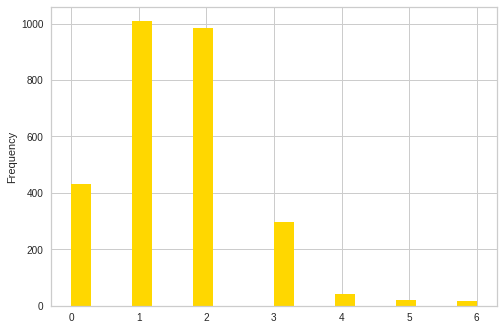

In [12]:
# General NaN´s in each rows
miss_data_row = data.isnull().sum(axis=1)
miss_data_row.plot(kind="hist", bins=20, fig=(30,15), color="gold")

### ***Note***: 
With this graph we see that the maximum number of nulls is 6 in each record. If we take into account that there are 26 columns at this point, they are records that have approximately 23% nulls, with which **NO** record will be **DELETED**, but will be treated by imputation.

# **5. Questions**

##  ***First Question: Do companies learn from their accidents?***
To answer this question i will transform "Accident Date/Time" to get Month and hour (military)

In [13]:
data["Accident Month"] = pd.DatetimeIndex(data['Accident Date/Time']).month
# data["Accident Day"] = pd.DatetimeIndex(data['Accident Date/Time']).day   #---> I don´t use day because is changing year to year, 
data["Accident Hour"] = pd.to_datetime(data['Accident Date/Time']).dt.strftime('%H')

In [14]:
# Reorder columns
data = data[['Accident Year', 'Accident Month', 'Accident Hour','Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Accident City', 'Accident State', 'Cause Category',
       'Cause Subcategory', 'Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Public Evacuations', 'Property Damage Costs',
       'Lost Commodity Costs', 'Public/Private Property Damage Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs',
       'Other Costs', 'All Costs']]
data.head()

,Accident Year,Accident Month,Accident Hour,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Accident City,Accident State,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,2010,1,07,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,MCPHERSON,KS,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,2010,1,08,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,RAYMOND,ME,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,2010,1,10,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,SULPHER,LA,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,2010,1,19,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,SUPERIOR,WI,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,2010,1,13,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,SHERMAN,TX,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


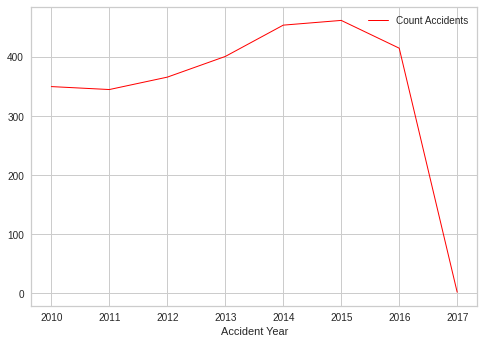

In [15]:
learn_year = data.groupby("Accident Year").size().reset_index(name='Count Accidents')
learn_year.plot.line(x = "Accident Year",y='Count Accidents',lw=1, color = 'red');

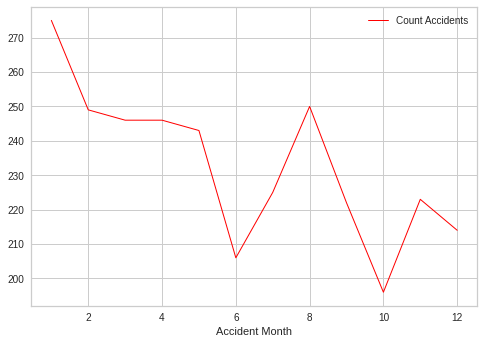

In [16]:
learn_Month = data.groupby("Accident Month").size().reset_index(name='Count Accidents')
learn_Month.plot.line(x = "Accident Month",y='Count Accidents',lw=1, color = 'red');

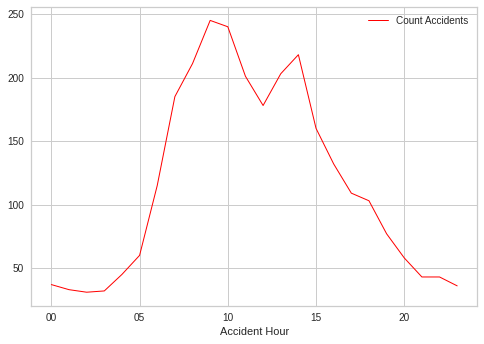

In [17]:
learn_Hour = data.groupby("Accident Hour").size().reset_index(name='Count Accidents')
learn_Hour.plot.line(x = "Accident Hour",y='Count Accidents',lw=1, color = 'red');

### ***Answer First Question***: 
Taking the graph of accidents per hour, we see that there are two peaks between 9:00 a.m. and 3:00 p.m., so if we wanted to recommend to the occupational health areas, these hours are when they should be most alert for a possible accident. Additionally, I wanted to do an analysis in which months there are more accidents, and apparently it occurs at the beginning of the year, in January and almost in the middle of the year in August as the second month with more accidents and that the increase in accidents rises sharply. , so that it is also kept in mind by the occupational health areas. Now, to answer my question, I carried out the analysis of accidents by year, which reveals that since 2011 the number of accidents began to increase, reaching its maximum in 2015. However, in 2016 it seems to be that they learned since a slight decrease in the accident figures was reflected, but it is not conclusive because the number of accidents continues to be high. Analyzing 2017 is not convenient because we only have two records for this year. That said, it is not conclusive or definitive to say that companies have learned from the experiences of previous years and it is worrying about the impacts it generates, so more actions must be taken to prevent the occurrence of these events, because ***they have not learned***!

#  ***Second Question: Does the fluid type influence accidents? or the cause? or both?*** 

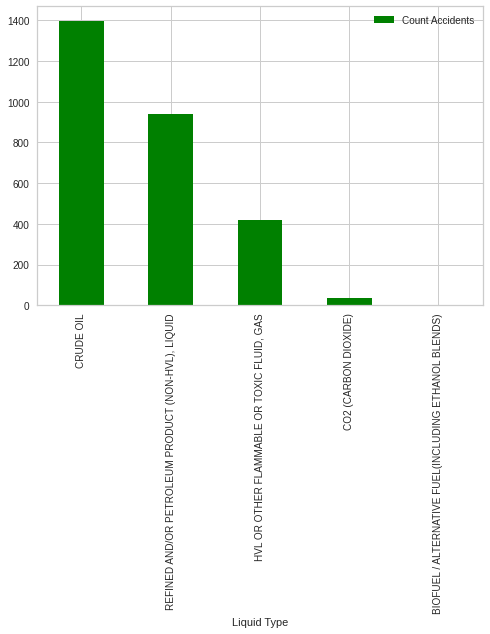

In [18]:
# plot by fluid type counting accidents
fluid_type = data.groupby("Liquid Type").size().reset_index(name='Count Accidents').sort_values(by=['Count Accidents'], ascending=False)
fluid_type.plot.bar(x="Liquid Type", y='Count Accidents', fig=(30,15), color='Green');

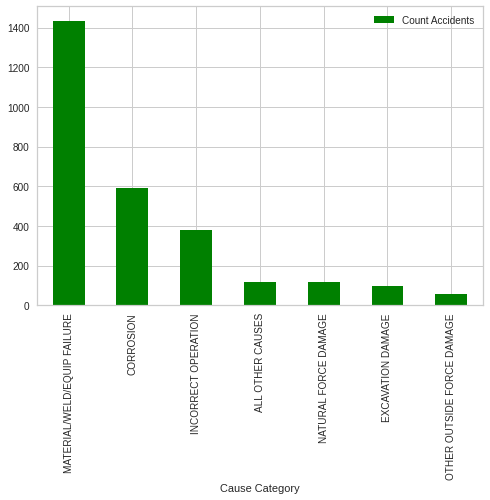

In [19]:
# plot by fluid type counting accidents
cause_categ = data.groupby("Cause Category").size().reset_index(name='Count Accidents').sort_values(by=['Count Accidents'], ascending=False)
cause_categ.plot.bar(x="Cause Category", y='Count Accidents', fig=(30,15), color='Green');

In [20]:
# Order counts by Cause Category and then size
combinations = data.groupby(['Cause Category', 'Liquid Type'], as_index=False).size()
combinations = combinations.sort_values(['Cause Category','size'], ascending= [True, False])
combinations 

,Cause Category,Liquid Type,size
2,ALL OTHER CAUSES,CRUDE OIL,55
4,ALL OTHER CAUSES,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",37
3,ALL OTHER CAUSES,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",21
1,ALL OTHER CAUSES,CO2 (CARBON DIOXIDE),4
0,ALL OTHER CAUSES,BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL B...,1
6,CORROSION,CRUDE OIL,419
8,CORROSION,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",132
7,CORROSION,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",35
5,CORROSION,CO2 (CARBON DIOXIDE),6
9,EXCAVATION DAMAGE,CRUDE OIL,44


In [21]:
# What is the most frecuently case?
data.groupby(['Cause Category', 'Liquid Type'], as_index=False).size().sort_values('size', ascending= False).head(2)

,Cause Category,Liquid Type,size
18,MATERIAL/WELD/EQUIP FAILURE,CRUDE OIL,608
20,MATERIAL/WELD/EQUIP FAILURE,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",528


### ***Answer Second Question***: 
To answer this question, the first thing I did was analyze each variable independently. For the fluid type variable, it is clear that transporting Crude Oil and Refined Petroleum Liquids in pipelines has a high probability of generating an accident. When analyzing the Cause Category variable, it is clearly observed that the first cause to appear is MATERIAL/WELD/EQUIP FAILURE and CORROSION second. One would think that if one tried to mitigate accidents in an optional way, either when Crude Oil is transported or improve the maintenance of equipment, welding or materials, accidents would be avoided, but the incredible thing is that it is not optional, actions must be taken when they have both scenarios. Additionally, the second combination is the same cause but with refined oil liquids with 528 cases. If companies paid attention to just these two combinations, 40% of accidents would be avoided. Moreover, I dare to mention a task that is mentioned in industrial maintenance and it is Paretto's theory where if he paid attention to 20% of these combinations, 80% of accidents would be avoided. In short, answering my question, it is the combination of **both variables** that influence accidents, or at least these two have a high relationship!

#  ***Third Question: Which operator has caused the most accidents? What is the operator that has generated the most costs?***

***1. Accident number***

In [22]:
data.groupby('Operator Name', as_index=False).size().sort_values('size', ascending = False). head(5)

,Operator Name,size
73,ENTERPRISE CRUDE PIPELINE LLC,195
185,SUNOCO PIPELINE L.P.,180
167,"PLAINS PIPELINE, L.P.",156
74,ENTERPRISE PRODUCTS OPERATING LLC,155
127,"MAGELLAN PIPELINE COMPANY, LP",140


In [23]:
ecp = data[data['Operator Name']=='ENTERPRISE CRUDE PIPELINE LLC']
ecp.groupby(['Cause Category', 'Liquid Type'], as_index=False).size().sort_values('size', ascending= False)

,Cause Category,Liquid Type,size
5,MATERIAL/WELD/EQUIP FAILURE,CRUDE OIL,88
1,CORROSION,CRUDE OIL,56
3,INCORRECT OPERATION,CRUDE OIL,24
0,ALL OTHER CAUSES,CRUDE OIL,21
2,EXCAVATION DAMAGE,CRUDE OIL,2
6,NATURAL FORCE DAMAGE,CRUDE OIL,2
4,INCORRECT OPERATION,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",1
7,OTHER OUTSIDE FORCE DAMAGE,CRUDE OIL,1


In [24]:
sp = data[data['Operator Name']=='SUNOCO PIPELINE L.P.']
sp.groupby(['Cause Category', 'Liquid Type'], as_index=False).size().sort_values('size', ascending= False)

,Cause Category,Liquid Type,size
1,CORROSION,CRUDE OIL,73
8,MATERIAL/WELD/EQUIP FAILURE,CRUDE OIL,51
5,INCORRECT OPERATION,CRUDE OIL,20
10,MATERIAL/WELD/EQUIP FAILURE,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",9
2,CORROSION,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",6
9,MATERIAL/WELD/EQUIP FAILURE,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",4
0,ALL OTHER CAUSES,CRUDE OIL,3
7,INCORRECT OPERATION,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",3
11,NATURAL FORCE DAMAGE,CRUDE OIL,3
4,EXCAVATION DAMAGE,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",2


In [25]:
pp = data[data['Operator Name']=='PLAINS PIPELINE, L.P.']
pp.groupby(['Cause Category', 'Liquid Type'], as_index=False).size().sort_values('size', ascending= False)

,Cause Category,Liquid Type,size
5,MATERIAL/WELD/EQUIP FAILURE,CRUDE OIL,62
0,CORROSION,CRUDE OIL,59
3,INCORRECT OPERATION,CRUDE OIL,18
1,EXCAVATION DAMAGE,CRUDE OIL,7
7,OTHER OUTSIDE FORCE DAMAGE,CRUDE OIL,5
6,NATURAL FORCE DAMAGE,CRUDE OIL,3
2,EXCAVATION DAMAGE,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",1
4,INCORRECT OPERATION,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",1


***2. Total costs***

In [26]:
# Sum all costs by Operator, and get top 10 companies with major costs
data.groupby('Operator Name', as_index=False)['All Costs'].sum().sort_values('All Costs', ascending = False). head(5)

,Operator Name,All Costs
61,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",918465669
167,"PLAINS PIPELINE, L.P.",169708804
80,EXXONMOBIL PIPELINE CO,149166535
40,COLONIAL PIPELINE CO,108248631
30,CHEVRON PIPE LINE CO,102672298


In [27]:
ee = data[data['Operator Name']=='ENBRIDGE ENERGY, LIMITED PARTNERSHIP']
ee.groupby(['Cause Category', 'Liquid Type'], as_index=False)['All Costs'].sum().sort_values('All Costs', ascending= False)

,Cause Category,Liquid Type,All Costs
3,MATERIAL/WELD/EQUIP FAILURE,CRUDE OIL,855288884
6,OTHER OUTSIDE FORCE DAMAGE,CRUDE OIL,50288703
1,CORROSION,CRUDE OIL,10911999
5,NATURAL FORCE DAMAGE,CRUDE OIL,1046850
2,INCORRECT OPERATION,CRUDE OIL,414224
0,ALL OTHER CAUSES,CRUDE OIL,289489
4,MATERIAL/WELD/EQUIP FAILURE,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",225520


In [28]:
pp2 = data[data['Operator Name']=='PLAINS PIPELINE, L.P.']
pp2.groupby(['Cause Category', 'Liquid Type'], as_index=False)['All Costs'].sum().sort_values('All Costs', ascending= False)

,Cause Category,Liquid Type,All Costs
0,CORROSION,CRUDE OIL,151904510
5,MATERIAL/WELD/EQUIP FAILURE,CRUDE OIL,11774526
1,EXCAVATION DAMAGE,CRUDE OIL,3765792
3,INCORRECT OPERATION,CRUDE OIL,1430897
7,OTHER OUTSIDE FORCE DAMAGE,CRUDE OIL,576034
2,EXCAVATION DAMAGE,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",188095
6,NATURAL FORCE DAMAGE,CRUDE OIL,64650
4,INCORRECT OPERATION,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",4300


In [29]:
epc = data[data['Operator Name']=='EXXONMOBIL PIPELINE CO']
epc.groupby(['Cause Category', 'Liquid Type'], as_index=False)['All Costs'].sum().sort_values('All Costs', ascending= False)

,Cause Category,Liquid Type,All Costs
9,NATURAL FORCE DAMAGE,CRUDE OIL,135322649
6,MATERIAL/WELD/EQUIP FAILURE,CRUDE OIL,8819807
10,NATURAL FORCE DAMAGE,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",2189705
3,CORROSION,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",777200
1,CORROSION,CRUDE OIL,757403
8,MATERIAL/WELD/EQUIP FAILURE,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",590815
0,ALL OTHER CAUSES,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",260450
7,MATERIAL/WELD/EQUIP FAILURE,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",174894
11,OTHER OUTSIDE FORCE DAMAGE,CRUDE OIL,170000
4,INCORRECT OPERATION,CRUDE OIL,58150


***3. Ratio = Total Costs / Accident Number***

In [30]:
ratio = data.copy()
acc = ratio.groupby('Operator Name', as_index=False).size().sort_values('size', ascending = False)
cost = ratio.groupby('Operator Name', as_index=False)['All Costs'].sum().sort_values('All Costs', ascending = False)
table = pd.merge(acc,cost,how='inner',on='Operator Name')
table['ratio'] = table['All Costs'] / table['size']
table = table.sort_values('ratio', ascending= False)
table.head(5)

,Operator Name,size,All Costs,ratio
62,MOBIL PIPE LINE COMPANY,7,91678045,1.309686e+07
10,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",71,918465669,1.293614e+07
93,CHEVRON PETROCHEMICAL PIPELINE LLC,4,26753223,6.688306e+06
55,ALYESKA PIPELINE SERVICE CO,8,48836519,6.104565e+06
112,AMOCO OIL CO,3,15152696,5.050899e+06


### ***Answer Third Question***: 
To answer this question, I wanted to analyze it from three variables:
* Accident number: In this case, when determining the number of accidents by operator, they were in the top 3: ENTERPRISE CRUDE PIPELINE LLC (195 accidents), SUNOCO PIPELINE L.P. (180 accidents) and PLAINS PIPELINE, L.P. (156 accidents), which on average means that there are almost two accidents per month in these 6 years (without taking into account 2017), which is a high figure.
* Total costs: This variable is the sum of the same for each operator, being in the top 3: ENBRIDGE ENERGY, LIMITED PARTNERSHIP (918465669 monetary unit), PLAINS PIPELINE, L.P. (169708804 monetary unit) and EXXONMOBIL PIPELINE CO (149166535 monetary unit)
* Ratio: This variable is created thinking that perhaps it could happen that an operator is first in number of accidents but in terms of cost it is low, and in the same way for the variable it adds total costs. With this, it allows me to see operators that in most accidents are high cost, being in the top 3: MOBIL PIPE LINE COMPANY (13.09M monetary unit), ENBRIDGE ENERGY, LIMITED PARTNERSHIP (12.93M monetary unit) and CHEVRON PETROCHEMICAL PIPELINE LLC (6.68M monetary unit)

*Curiosity*: In all the top three operators both in number of accidents and costs, it was observed that the liquid with the most accidents was CRUDE OIL. With this we validate question 2, in the sense of giving much more attention in the operations of the pipes to this type of liquid.


With these aspects, to answer the question posed, I will assess the ratio variable since it indicates the impact on costs each time there is an accident, thus being **MOBIL PIPE LINE COMPANY** the company that generates the highest cost per accident.

#  ***Fourth Question: The environmental aspect in these times is the factor for which the oil industry is questioned and actions are increasingly presented to prohibit its operations, seeking to mitigate climate change. With these data, what is the participation of the environmental cost over the total costs? What has been the most impacted city in the environmental aspect?***

In [31]:
costs = data[['Property Damage Costs','Lost Commodity Costs', 'Public/Private Property Damage Costs','Emergency Response Costs', 'Environmental Remediation Costs','Other Costs']].sum()
costs = costs.to_frame().T
costs

,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs
0,313081992.0,27366589.0,69964627.0,814084371.0,1.011150e+09,95475434.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


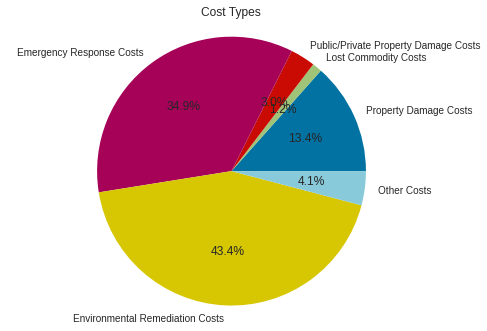

In [32]:
# Graph cost type participations
my_labels = costs.columns
plt.pie(costs,labels=my_labels,autopct='%1.1f%%')
plt.title('Cost Types')
plt.axis('equal')
plt.show()

In [33]:
data.groupby('Accident City', as_index=False)['Environmental Remediation Costs'].sum().sort_values('Environmental Remediation Costs', ascending = False).head(5)

,Accident City,Environmental Remediation Costs
577,MARSHALL,635000000.0
365,GOLETA,22421933.0
237,DANSVILLE,20300000.0
587,MAYFLOWER,20100000.0
812,SALT LAKE CITY,18933258.0


In [34]:
marsh = data[data['Accident City']=='MARSHALL']
marsh.groupby(['Operator Name'], as_index=False)['Environmental Remediation Costs'].sum().sort_values('Environmental Remediation Costs', ascending= False)

,Operator Name,Environmental Remediation Costs
0,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",635000000.0


### ***Answer Third Question***: 
In this last question, it's actually two questions, which I'll answer in order:
1. To see if the approach of the question made sense, when totaling the costs, it is observed that the highest cost is the "Environmental Remediation Costs" with 43% of the total costs, which leads us to think that the operators do not take into account It takes into account the environment in its operations, and validates that there are organizations against these companies by even impacting climate change.
2. The city most impacted at an environmental level has been MARSHALL, being compensated by ENBRIDGE ENERGY, LIMITED PARTNERSHIP (one of the companies that pays the most total costs and the second in the cost/accident ratio)

Operators are invited to improve their commitment to the environment in their operations

#**6. Data Description and Cleaning (Continue)**

## Fill NaN

In [35]:
# Need to convert Accident Hour from Object to Number
data['Accident Hour'] = pd.to_numeric(data['Accident Hour'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Accident Year                         2795 non-null   int64  
 1   Accident Month                        2795 non-null   int64  
 2   Accident Hour                         2795 non-null   int64  
 3   Operator Name                         2795 non-null   object 
 4   Pipeline/Facility Name                2674 non-null   object 
 5   Pipeline Location                     2795 non-null   object 
 6   Pipeline Type                         2777 non-null   object 
 7   Liquid Type                           2795 non-null   object 
 8   Liquid Subtype                        1349 non-null   object 
 9   Accident City                         2480 non-null   object 
 10  Accident State                        2783 non-null   object 
 11  Cause Category   

In [36]:
# Only 'Public Evacuations' variable (numeric variable) I will use mode, because most registers are zero, I'll assume the NaNs are zero too 
data.groupby('Public Evacuations').size()
data['Public Evacuations'].mode()

0    0.0
dtype: float64

In [37]:
# fill 'Public Evacuations' variable with mode
data['Public Evacuations'].fillna(value=0 , inplace=True) 

In [38]:
# Check this variable filled
data['Public Evacuations'].isna().sum()

0

In [39]:
    # I will fill NaN with mean in each number column
    num_vars = data.select_dtypes(include=['float', 'int']).columns   
    #num_vars
    for col in num_vars:
        data[col].fillna((data[col].mean()), inplace=True)

In [40]:
    # I will fill NaN with mode in each categorical column
    categ_vars = data.select_dtypes(include=['object']).columns   
    #categ_vars
    for col in categ_vars:
        data[col].fillna((data[col].mode()[0]), inplace=True)

In [41]:
# Check all columns have been filled
count_nan = data.isnull().sum()
count_nan

Accident Year                           0
Accident Month                          0
Accident Hour                           0
Operator Name                           0
Pipeline/Facility Name                  0
Pipeline Location                       0
Pipeline Type                           0
Liquid Type                             0
Liquid Subtype                          0
Accident City                           0
Accident State                          0
Cause Category                          0
Cause Subcategory                       0
Unintentional Release (Barrels)         0
Intentional Release (Barrels)           0
Liquid Recovery (Barrels)               0
Net Loss (Barrels)                      0
Liquid Ignition                         0
Liquid Explosion                        0
Pipeline Shutdown                       0
Public Evacuations                      0
Property Damage Costs                   0
Lost Commodity Costs                    0
Public/Private Property Damage Cos

In [42]:
# Get categorics by object columns (Problem: Multicategorical)
for col in categ_vars:
  print(col, data[col].nunique())

Operator Name 229
Pipeline/Facility Name 1977
Pipeline Location 2
Pipeline Type 4
Liquid Type 5
Liquid Subtype 8
Accident City 1027
Accident State 46
Cause Category 7
Cause Subcategory 38
Liquid Ignition 2
Liquid Explosion 2
Pipeline Shutdown 2


## Delete columns

Other columns to delete:
* ***Accident Year***: Cluster by year doesn't make sense
* ***Operator Name***: It will create too many variables affecting the performance of the model
* ***Pipeline/Facility Name***: It will create too many variables affecting the performance of the model
* ***Accident City***: It will create too many variables affecting the performance of the model and it will be represented by 'Accident State'
* ***Cause Subcategory***: It´s similar and its implicit inside the variable "Cause Category"
* ***All Costs***: It will be represented in the other costs, since this is the result of adding said costs

In [43]:
data.drop(['Accident Year','Operator Name','Pipeline/Facility Name','Accident City','Cause Subcategory','All Costs'], axis=1, inplace= True)

#### ***Case: Liquid type and Liquid subtype***

In [44]:
data.groupby(['Liquid Type','Liquid Subtype'], as_index=False).size().sort_values(['Liquid Type','Liquid Subtype'], ascending= [False,True])

,Liquid Type,Liquid Subtype,size
7,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","DIESEL, FUEL OIL, KEROSENE, JET FUEL",414
8,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",GASOLINE (NON-ETHANOL),376
9,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER...,98
10,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",OTHER,51
3,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",ANHYDROUS AMMONIA,55
4,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","DIESEL, FUEL OIL, KEROSENE, JET FUEL",4
5,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,188
6,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,171
2,CRUDE OIL,"DIESEL, FUEL OIL, KEROSENE, JET FUEL",1398
1,CO2 (CARBON DIOXIDE),"DIESEL, FUEL OIL, KEROSENE, JET FUEL",38


With the last table, we can see in liquid subtype 'DIESEL, FUEL OIL, KEROSENE, JET FUEL' is in different Liquid type, so i will delete 'Liquid Subtype'



In [45]:
# drop 'Liquid Subtype'
data.drop(['Liquid Subtype'], axis=1, inplace= True)

#**7. Transformations**

In [46]:
data_tf = data.copy()

### ***7.1. Get Dummies***

In [47]:
# Use variable with categorical column names and i get dummies for each one
categ_vars = data_tf.select_dtypes(include=['object']).copy().columns

for var in  categ_vars:
  # for each cat add dummy var, drop original column
  data_tf = pd.concat([data_tf.drop(var, axis=1), pd.get_dummies(data_tf[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [48]:
data_tf.head()

,Accident Month,Accident Hour,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,Pipeline Location_ONSHORE,Pipeline Type_TANK,Pipeline Type_TRANSITION AREA,Pipeline Type_UNDERGROUND,Liquid Type_CO2 (CARBON DIOXIDE),Liquid Type_CRUDE OIL,"Liquid Type_HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","Liquid Type_REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",Accident State_AL,Accident State_AR,Accident State_CA,Accident State_CO,Accident State_CT,Accident State_FL,Accident State_GA,Accident State_HI,Accident State_IA,Accident State_ID,Accident State_IL,Accident State_IN,Accident State_KS,Accident State_KY,Accident State_LA,Accident State_MA,Accident State_MD,Accident State_ME,Accident State_MI,Accident State_MN,Accident State_MO,Accident State_MS,Accident State_MT,Accident State_NC,Accident State_ND,Accident State_NE,Accident State_NJ,Accident State_NM,Accident State_NV,Accident State_NY,Accident State_OH,Accident State_OK,Accident State_OR,Accident State_PA,Accident State_PR,Accident State_SC,Accident State_SD,Accident State_TN,Accident State_TX,Accident State_UT,Accident State_VA,Accident State_WA,Accident State_WI,Accident State_WV,Accident State_WY,Cause Category_CORROSION,Cause Category_EXCAVATION DAMAGE,Cause Category_INCORRECT OPERATION,Cause Category_MATERIAL/WELD/EQUIP FAILURE,Cause Category_NATURAL FORCE DAMAGE,Cause Category_OTHER OUTSIDE FORCE DAMAGE,Liquid Ignition_YES,Liquid Explosion_YES,Pipeline Shutdown_YES
0,1,7,21.00,0.100000,0.00,21.0,0.0,110.0,1517.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,8,0.12,0.000000,0.12,0.0,0.0,4000.0,8.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,10,2.00,0.000000,0.00,2.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,19,0.48,0.000000,0.48,0.0,0.0,200.0,40.0,0.0,11300.0,0.0,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,1,13,700.00,238.533623,698.00,2.0,0.0,20000.0,150.0,0.0,7500.0,2000.0,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### ***7.2. Scaling***

In [49]:
# I think in: Standard Scaler, Robust Scaler and MinMax Scaler, So, I will use the last option (Between 0 and 1)

# Escaling with Normalization - MinMax Scaler 
scaler = preprocessing.MinMaxScaler()

# Copy dataframe and get a new variable with dataframe i´ve been working
data_scaled = data_tf.copy()

# get numeric column names
num_vars = data.select_dtypes(include=['float', 'int']).copy().columns

# Scaling numeric columns
for c in num_vars:
    data_scaled[c] = scaler.fit_transform(data[[c]])


data_scaled.head(5)

,Accident Month,Accident Hour,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,Pipeline Location_ONSHORE,Pipeline Type_TANK,Pipeline Type_TRANSITION AREA,Pipeline Type_UNDERGROUND,Liquid Type_CO2 (CARBON DIOXIDE),Liquid Type_CRUDE OIL,"Liquid Type_HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","Liquid Type_REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",Accident State_AL,Accident State_AR,Accident State_CA,Accident State_CO,Accident State_CT,Accident State_FL,Accident State_GA,Accident State_HI,Accident State_IA,Accident State_ID,Accident State_IL,Accident State_IN,Accident State_KS,Accident State_KY,Accident State_LA,Accident State_MA,Accident State_MD,Accident State_ME,Accident State_MI,Accident State_MN,Accident State_MO,Accident State_MS,Accident State_MT,Accident State_NC,Accident State_ND,Accident State_NE,Accident State_NJ,Accident State_NM,Accident State_NV,Accident State_NY,Accident State_OH,Accident State_OK,Accident State_OR,Accident State_PA,Accident State_PR,Accident State_SC,Accident State_SD,Accident State_TN,Accident State_TX,Accident State_UT,Accident State_VA,Accident State_WA,Accident State_WI,Accident State_WV,Accident State_WY,Cause Category_CORROSION,Cause Category_EXCAVATION DAMAGE,Cause Category_INCORRECT OPERATION,Cause Category_MATERIAL/WELD/EQUIP FAILURE,Cause Category_NATURAL FORCE DAMAGE,Cause Category_OTHER OUTSIDE FORCE DAMAGE,Liquid Ignition_YES,Liquid Explosion_YES,Pipeline Shutdown_YES
0,0.0,0.304348,0.000687,0.000001,0.000000,0.000687,0.0,0.000004,0.001070,0.0,0.000000,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.0,0.347826,0.000004,0.000000,0.000007,0.000000,0.0,0.000148,0.000006,0.0,0.000000,0.000000,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.0,0.434783,0.000065,0.000000,0.000000,0.000065,0.0,0.000000,0.000141,0.0,0.000000,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.0,0.826087,0.000016,0.000000,0.000026,0.000000,0.0,0.000007,0.000028,0.0,0.000064,0.000000,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,0.0,0.565217,0.022902,0.003398,0.038257,0.000065,0.0,0.000741,0.000106,0.0,0.000042,0.000003,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
print(f'The columns number of dataset:',data_scaled.shape[1])
print(f'The rows number of dataset:',data_scaled.shape[0])

The columns number of dataset: 75
The rows number of dataset: 2795


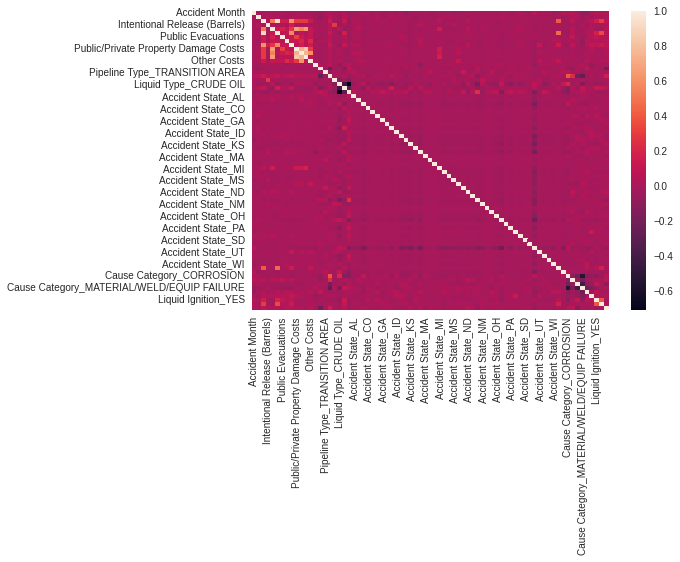

In [51]:
# Get correlations with heat map (In general is normal correlation)
sns.heatmap(data_scaled.corr());

### ***7.3. Get PCA***

In [52]:
## Get new variables with PCA, because I have a large columns
pca = PCA()
pca.fit(data_scaled)

PCA()

In [53]:
# It will show me for each equation the variance
pca.explained_variance_ratio_

array([1.64576765e-01, 1.23513450e-01, 1.01775920e-01, 8.62750192e-02,
       6.69642557e-02, 6.43319950e-02, 4.10750166e-02, 3.45913662e-02,
       2.86770777e-02, 2.69145706e-02, 2.09248235e-02, 1.98804622e-02,
       1.83404273e-02, 1.55198698e-02, 1.55113132e-02, 1.29795389e-02,
       1.21986432e-02, 1.09522087e-02, 1.02714811e-02, 9.20813178e-03,
       8.09600176e-03, 7.41327499e-03, 7.11148080e-03, 6.80607472e-03,
       6.25304948e-03, 6.03202785e-03, 5.51810448e-03, 5.45940320e-03,
       5.32927521e-03, 4.32977503e-03, 3.85941112e-03, 3.68262422e-03,
       3.41757411e-03, 3.06605617e-03, 2.81328151e-03, 2.68285878e-03,
       2.52137604e-03, 2.24711634e-03, 2.18354651e-03, 2.13582017e-03,
       2.06135388e-03, 2.01577430e-03, 1.87364170e-03, 1.76744757e-03,
       1.75953112e-03, 1.65041859e-03, 1.61195350e-03, 1.20677502e-03,
       1.17443672e-03, 1.05191265e-03, 9.94655901e-04, 9.78839160e-04,
       8.90846212e-04, 8.64213061e-04, 6.15539370e-04, 5.22726817e-04,
      

In [55]:
graph = pd.DataFrame({'Número componentes': range(1,76), 'Varianza acumulada': pca.explained_variance_ratio_.cumsum()})
fig = (px.line(graph, x='Número componentes', y='Varianza acumulada', template='seaborn')).update_traces(mode='lines+markers')
fig.update_layout(height = 450, width = 800, xaxis_title="Número de componentes", yaxis_title="Varianza acumulada",title='Varianza de componentes principales', plot_bgcolor='rgba(0,0,0,0)')
fig.add_vline(x=0.0, line_width=2, line_color="black")
fig.add_hline(y=0.4, line_width=2, line_color="black")
fig.add_hrect(y0=0.8, y1=1.01, line_width=0, fillcolor="yellow", opacity=0.30)
fig.show()

In [56]:
# I selected the number of component up and near 80% (variance accumulated)
pca_selec = PCA(n_components = 14) # With last graph i selected 14 components

In [57]:
pca_selec.fit(data_scaled)

PCA(n_components=14)

In [58]:
# get variance with 14 components
pca_selec.transform(data_scaled)

array([[-0.24521128, -0.01408293,  0.57730991, ..., -0.34430846,
        -0.49027092, -0.46524053],
       [ 0.03868028, -0.66099734, -0.58146583, ..., -0.02091777,
         0.02788888,  0.0246969 ],
       [-0.64348427, -0.23511906, -0.82562778, ...,  0.7166625 ,
        -0.05685652, -0.17073757],
       ...,
       [ 0.0160112 , -0.97692753,  0.27917166, ...,  0.10854202,
        -0.05781564, -0.19509669],
       [-0.4026378 ,  0.89686148,  0.57006532, ..., -0.13578425,
         0.04181901, -0.05715685],
       [ 0.57922229, -0.61126045,  0.9451203 , ...,  0.07310305,
         0.00188135, -0.13372757]])

In [59]:
# get scores pca
score_pca_def = pca_selec.transform(data_scaled)

#**8. Modeling**

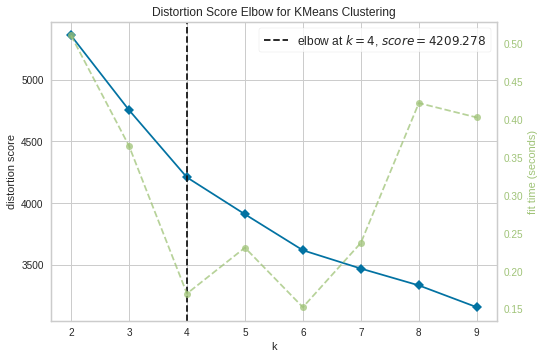

In [60]:
# This library (yellowbrick with KElbowVisualizer) is useful to get easily an elbow graph to determine the number of clusters

model = KMeans()

graph = KElbowVisualizer(model, k=(2,10), algorithm = 'auto')
graph.fit(score_pca_def)
graph.show()

In [61]:
np.random.seed(124) # get same result in different executes
wss = []
silhouttes = []
for k in range(2,10):
    modelo = KMeans(n_clusters = k, algorithm = 'auto')
    modelo.fit(score_pca_def)
    wss.append(modelo.inertia_)
    silhouttes.append(silhouette_score(score_pca_def, modelo.labels_, metric='euclidean', sample_size=1000, random_state=200))

In [62]:
graph_2 = pd.DataFrame({'Clusters': range(2,10), 'Silhouette Score': silhouttes})
fig = (px.line(graph_2, x='Clusters', y='Silhouette Score', template='seaborn')).update_traces(mode='lines+markers')
fig.update_layout(height = 450, width = 800, xaxis_title="Clusters", yaxis_title="Silhoutte Index",title='Silhoutte Method', plot_bgcolor='rgba(0,0,0,0)')
fig.add_vline(x=1.5, line_width=2, line_color="black")
fig.add_hline(y=0.4, line_width=2, line_color="black")
fig.add_hrect(y0=0.5, y1=0.99, line_width=0, fillcolor="green", opacity=0.2)
fig.show()

In [63]:
# Model with the best cluster
kmeans_opt = KMeans(n_clusters = 4, algorithm = 'auto')
kmeans_opt.fit(score_pca_def)

KMeans(n_clusters=4)

In [64]:
# Print metrics with this clusters
print("wss", kmeans_opt.inertia_)
silhouette_score = metrics.silhouette_score(score_pca_def, kmeans_opt.labels_, metric='euclidean', sample_size=10000, random_state=200)
print("Silhouette: ", silhouette_score)

wss 4215.728167335663
Silhouette:  0.21271149596173208


In [65]:
# Add our database scaled the cluster labels
data_scaled['cluster']  = kmeans_opt.labels_
data_scaled.head(10)

,Accident Month,Accident Hour,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,Pipeline Location_ONSHORE,Pipeline Type_TANK,Pipeline Type_TRANSITION AREA,Pipeline Type_UNDERGROUND,Liquid Type_CO2 (CARBON DIOXIDE),Liquid Type_CRUDE OIL,"Liquid Type_HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","Liquid Type_REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",Accident State_AL,Accident State_AR,Accident State_CA,Accident State_CO,Accident State_CT,Accident State_FL,Accident State_GA,Accident State_HI,Accident State_IA,Accident State_ID,Accident State_IL,Accident State_IN,Accident State_KS,Accident State_KY,Accident State_LA,Accident State_MA,Accident State_MD,Accident State_ME,Accident State_MI,Accident State_MN,Accident State_MO,Accident State_MS,Accident State_MT,Accident State_NC,Accident State_ND,Accident State_NE,Accident State_NJ,Accident State_NM,Accident State_NV,Accident State_NY,Accident State_OH,Accident State_OK,Accident State_OR,Accident State_PA,Accident State_PR,Accident State_SC,Accident State_SD,Accident State_TN,Accident State_TX,Accident State_UT,Accident State_VA,Accident State_WA,Accident State_WI,Accident State_WV,Accident State_WY,Cause Category_CORROSION,Cause Category_EXCAVATION DAMAGE,Cause Category_INCORRECT OPERATION,Cause Category_MATERIAL/WELD/EQUIP FAILURE,Cause Category_NATURAL FORCE DAMAGE,Cause Category_OTHER OUTSIDE FORCE DAMAGE,Liquid Ignition_YES,Liquid Explosion_YES,Pipeline Shutdown_YES,cluster
0,0.0,0.304348,0.000687,0.000001,0.000000,0.000687,0.0,0.000004,0.001070,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,0.347826,0.000004,0.000000,0.000007,0.000000,0.0,0.000148,0.000006,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,0.0,0.434783,0.000065,0.000000,0.000000,0.000065,0.0,0.000000,0.000141,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.0,0.826087,0.000016,0.000000,0.000026,0.000000,0.0,0.000007,0.000028,0.000000,0.000064,0.000000,0.000000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2
4,0.0,0.565217,0.022902,0.003398,0.038257,0.000065,0.0,0.000741,0.000106,0.000000,0.000042,0.000003,0.000000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
5,0.0,1.000000,0.123802,0.000000,0.084790,0.073188,0.0,0.002850,0.118331,0.006522,0.010169,0.003150,0.000000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
6,0.0,0.000000,0.001145,0.000000,0.001644,0.000164,0.0,0.000000,0.000282,0.000000,0.000000,0.000110,0.000000,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
7,0.0,0.043478,0.000008,0.000000,0.000000,0.000008,0.0,0.000015,0.000009,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8,0.0,0.826087,0.000013,0.000000,0.000022,0.000000,0.0,0.000000,0.000237,0.000000,0.000000,0.000063,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3
9,0.0,0.608696,0.000016,0.000000,0.000026,0.000000,0.0,0.000000,0.000035,0.000000,0.000056,0.000016,0.000447,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [66]:
# Change the Cluster Labels from 1 to 4
conditions = [
    (data_scaled['cluster'] == 0),
    (data_scaled['cluster'] == 1),
    (data_scaled['cluster'] == 2),
    (data_scaled['cluster'] == 3)
]
 
choices = ['1','2','3','4']
data_scaled['CLUSTER'] =  np.select(conditions, choices, default = 'N/A')

In [67]:
# How many accident register is in each cluster labels?:
data_scaled.groupby('CLUSTER').size()

CLUSTER
1    404
2    896
3    644
4    851
dtype: int64

In [71]:
# Centroids to get a name to each cluster
data_scaled.groupby('CLUSTER').mean()


,Accident Month,Accident Hour,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,Pipeline Location_ONSHORE,Pipeline Type_TANK,Pipeline Type_TRANSITION AREA,Pipeline Type_UNDERGROUND,Liquid Type_CO2 (CARBON DIOXIDE),Liquid Type_CRUDE OIL,"Liquid Type_HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","Liquid Type_REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",Accident State_AL,Accident State_AR,Accident State_CA,Accident State_CO,Accident State_CT,Accident State_FL,Accident State_GA,Accident State_HI,Accident State_IA,Accident State_ID,Accident State_IL,Accident State_IN,Accident State_KS,Accident State_KY,Accident State_LA,Accident State_MA,Accident State_MD,Accident State_ME,Accident State_MI,Accident State_MN,Accident State_MO,Accident State_MS,Accident State_MT,Accident State_NC,Accident State_ND,Accident State_NE,Accident State_NJ,Accident State_NM,Accident State_NV,Accident State_NY,Accident State_OH,Accident State_OK,Accident State_OR,Accident State_PA,Accident State_PR,Accident State_SC,Accident State_SD,Accident State_TN,Accident State_TX,Accident State_UT,Accident State_VA,Accident State_WA,Accident State_WI,Accident State_WV,Accident State_WY,Cause Category_CORROSION,Cause Category_EXCAVATION DAMAGE,Cause Category_INCORRECT OPERATION,Cause Category_MATERIAL/WELD/EQUIP FAILURE,Cause Category_NATURAL FORCE DAMAGE,Cause Category_OTHER OUTSIDE FORCE DAMAGE,Liquid Ignition_YES,Liquid Explosion_YES,Pipeline Shutdown_YES,cluster
CLUSTER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.496850,0.546061,0.019405,0.009604,0.000208,0.019281,0.004342,0.005817,0.019576,0.000143,0.000209,0.000032,0.000723,1.000000,0.012376,0.000000,0.363861,0.044554,0.000000,0.955446,0.000000,0.004950,0.004950,0.000000,0.024752,0.000000,0.002475,0.002475,0.000000,0.066832,0.000000,0.022277,0.009901,0.096535,0.000000,0.108911,0.000000,0.000000,0.000000,0.012376,0.012376,0.017327,0.002475,0.002475,0.000000,0.002475,0.012376,0.000000,0.017327,0.000000,0.002475,0.007426,0.108911,0.0000,0.019802,0.000000,0.004950,0.000000,0.000000,0.405941,0.000000,0.000000,0.000000,0.004950,0.00495,0.017327,0.007426,0.049505,0.099010,0.717822,0.042079,0.027228,0.096535,0.027228,0.660891,0.0
2,0.462865,0.496700,0.004266,0.002325,0.005461,0.001007,0.000250,0.002902,0.003508,0.001672,0.001984,0.001246,0.000914,0.986607,0.149554,0.003348,0.111607,0.014509,0.983259,0.000000,0.000000,0.003348,0.004464,0.050223,0.004464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042411,0.016741,0.053571,0.004464,0.061384,0.000000,0.000000,0.001116,0.012277,0.033482,0.010045,0.013393,0.015625,0.000000,0.033482,0.005580,0.001116,0.035714,0.000000,0.001116,0.012277,0.102679,0.0000,0.001116,0.000000,0.000000,0.003348,0.002232,0.392857,0.004464,0.000000,0.000000,0.014509,0.00000,0.052455,0.000000,0.003348,0.205357,0.688616,0.042411,0.016741,0.032366,0.003348,0.504464,1.0
3,0.507623,0.504793,0.006939,0.002619,0.006409,0.003113,0.001282,0.006543,0.006071,0.001922,0.002853,0.000444,0.004098,0.990683,0.034161,0.004658,0.815217,0.009317,0.802795,0.049689,0.138199,0.000000,0.003106,0.097826,0.001553,0.001553,0.000000,0.004658,0.001553,0.001553,0.003106,0.023292,0.006211,0.043478,0.009317,0.035714,0.003106,0.001553,0.000000,0.004658,0.010870,0.012422,0.012422,0.006211,0.004658,0.017081,0.003106,0.004658,0.017081,0.001553,0.006211,0.010870,0.114907,0.0000,0.010870,0.000000,0.003106,0.001553,0.003106,0.437888,0.004658,0.004658,0.000000,0.013975,0.00000,0.052795,0.847826,0.063665,0.018634,0.000000,0.026398,0.015528,0.006211,0.000000,0.653727,2.0
4,0.463519,0.496551,0.003314,0.002172,0.002812,0.001636,0.000489,0.002892,0.005132,0.000305,0.001069,0.000213,0.000641,1.000000,0.164512,0.011751,0.250294,0.001175,0.000000,0.000000,0.998825,0.018801,0.00

#**9. Cluster Description**

* ***Cluster 1***: Those accidents a little more than half the day, with UNINTENTIONAL and INTENTIONAL RELEASE, they are ONSHORE pipelines, were involved as type of liquids: [CO2 (CARBON DIOXIDE)] and [HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS] in the state of TX in these accidents were PIPELINE SHUTDOWN
* ***Cluster 2***: Are those accidents a little less than half the day, it is probably an OFFSHORE pipeline, handling as a type of liquid: [CRUDE OIL]. Is clearly the cause of accident is INCORRECT OPERATION
* ***Cluster 3***: Are those accidents a little more than half the day, it is likely to be an OFFSHORE pipeline, with Pipeline Type: UNDERGROUND, is strong see CRUDE OIL, accidents in State: OK and TX, the accident cause is: CORROSION and EXCAVATION DAMAGE in this accidents were PIPELINE SHUTDOWN
* ***Cluster 4***: They are those accidents a little less than half the day, they are ONSHORE pipelines. In this cluster we can see TANKS. They transported [REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID] as liquid type. The accident cause were: [INCORRECT OPERATION] and [MATERIAL/WELD/EQUIP FAILURE]